In [10]:
import kagglehub
fedesoriano_stroke_prediction_dataset_path = kagglehub.dataset_download('fedesoriano/stroke-prediction-dataset')
import numpy as np
import pandas as pd
from scipy.stats import shapiro, kstest, probplot, mannwhitneyu, kruskal
import matplotlib.pyplot as plt

In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [12]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df = df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,formerly smoked,0


Teste de normalidade para 'stroke':
Shapiro-Wilk: Estatística = 0.2202, p-valor = 0.0000
Kolmogorov-Smirnov: Estatística = 0.5408, p-valor = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


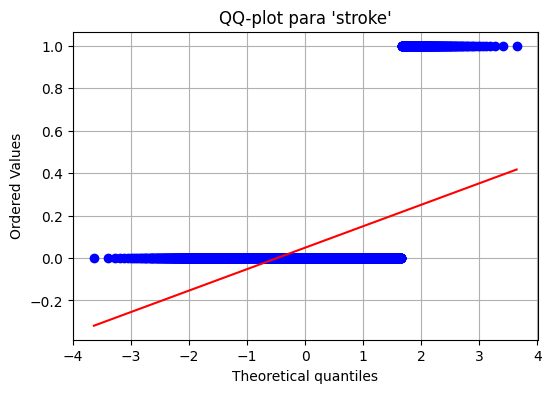

In [15]:
# 1. Teste de normalidade para 'stroke'
print("Teste de normalidade para 'stroke':")
shapiro_test = shapiro(df['stroke'])
print(f"Shapiro-Wilk: Estatística = {shapiro_test.statistic:.4f}, p-valor = {shapiro_test.pvalue:.4f}")

media = df['stroke'].mean()
desvio = df['stroke'].std()
ks_test = kstest(df['stroke'], 'norm', args=(media, desvio))
print(f"Kolmogorov-Smirnov: Estatística = {ks_test.statistic:.4f}, p-valor = {ks_test.pvalue:.4f}")

plt.figure(figsize=(6, 4))
probplot(df['stroke'], dist="norm", plot=plt)
plt.title("QQ-plot para 'stroke'")
plt.grid(True)
plt.show()

In [14]:
# 2. Testes de comparação entre grupos (variáveis categóricas)

# gender (3 grupos) - Kruskal-Wallis
print("Teste Kruskal-Wallis para 'gender':")
grupos = [df[df['gender'] == g]['stroke'] for g in df['gender'].unique()]
print(kruskal(*grupos), '\n')

# hypertension (0/1) - Mann-Whitney
print("Teste Mann-Whitney para 'hypertension':")
grupo0 = df[df['hypertension'] == 0]['stroke']
grupo1 = df[df['hypertension'] == 1]['stroke']
print(mannwhitneyu(grupo0, grupo1), '\n')

# heart_disease (0/1) - Mann-Whitney
print("Teste Mann-Whitney para 'heart_disease':")
grupo0 = df[df['heart_disease'] == 0]['stroke']
grupo1 = df[df['heart_disease'] == 1]['stroke']
print(mannwhitneyu(grupo0, grupo1), '\n')

# ever_married (Yes/No) - Mann-Whitney
print("Teste Mann-Whitney para 'ever_married':")
grupo0 = df[df['ever_married'] == 'No']['stroke']
grupo1 = df[df['ever_married'] == 'Yes']['stroke']
print(mannwhitneyu(grupo0, grupo1), '\n')

# work_type (5 grupos) - Kruskal-Wallis
print("Teste Kruskal-Wallis para 'work_type':")
grupos = [df[df['work_type'] == wt]['stroke'] for wt in df['work_type'].unique()]
print(kruskal(*grupos), '\n')

# Residence_type (2 grupos) - Mann-Whitney
print("Teste Mann-Whitney para 'Residence_type':")
grupo0 = df[df['Residence_type'] == 'Rural']['stroke']
grupo1 = df[df['Residence_type'] == 'Urban']['stroke']
print(mannwhitneyu(grupo0, grupo1), '\n')

# smoking_status (4 grupos) - Kruskal-Wallis
print("Teste Kruskal-Wallis para 'smoking_status':")
grupos = [df[df['smoking_status'] == s]['stroke'] for s in df['smoking_status'].unique()]
print(kruskal(*grupos), '\n')

Teste Kruskal-Wallis para 'gender':
KruskalResult(statistic=np.float64(0.4724941461388819), pvalue=np.float64(0.7895855645016446)) 

Teste Mann-Whitney para 'hypertension':
MannwhitneyuResult(statistic=np.float64(1041759.0), pvalue=np.float64(6.120973948168475e-20)) 

Teste Mann-Whitney para 'heart_disease':
MannwhitneyuResult(statistic=np.float64(581369.0), pvalue=np.float64(5.2510318536289465e-22)) 

Teste Mann-Whitney para 'ever_married':
MannwhitneyuResult(statistic=np.float64(2800959.0), pvalue=np.float64(9.648714736331722e-15)) 

Teste Kruskal-Wallis para 'work_type':
KruskalResult(statistic=np.float64(49.153890937158764), pvalue=np.float64(5.422716230508193e-10)) 

Teste Mann-Whitney para 'Residence_type':
MannwhitneyuResult(statistic=np.float64(3241449.0), pvalue=np.float64(0.2692169084346451)) 

Teste Kruskal-Wallis para 'smoking_status':
KruskalResult(statistic=np.float64(29.141565224824266), pvalue=np.float64(2.091163849879529e-06)) 

